# 5. 패널티 회귀와 최소 분산 포트폴리오를 위한 희소 헤징

[5.1.1] 단순회귀
- $\beta$에 대한 최선의 선택: 오차 최소화 (잔차 제곱 합, SSR) ~ 1계 조건=0

[5.1.2] 패널티의 형태
- 패널티 회귀: 회귀 계수에 제약을 가하는 것 ~ 계수의 전체 크기를 제한하는 것
- Lasso Model:
$\\y_i=\sum^J_{j=1}\beta_j x_{i,j}+\epsilon_i,\ i=1,...,I,\ s.t.\ \sum^{J}_{j=1}|\beta_j|<\delta$
$\\$ in 최소 제곱의 최소화, 라그랑지안 문제로 귀결됨: $min_{\beta}{\sum^I_{i=1}(y_i-\sum^J_{j=1}\beta_jx_{i,j})^2+\lambda\sum^J_{j=1}|\beta_j|}$
- Ridge model($L^2$):
$\\ min_{\beta}{\sum^I_{i=1}(y_i-\sum^J_{j=1}\beta_jx_{i,j})^2+\lambda\sum^J_{j=1}\beta^2_j}$
$\\y_i=\sum^J_{j=1}\beta_j x_{i,j}+\epsilon_i,\ i=1,...,I,\ s.t.\ \sum^{J}_{j=1}\beta^2_j<\delta$
- 패널티 강도 $\lambda$가 증가하면 모든 릿지 회귀 계수들은 0으로 줄어듦

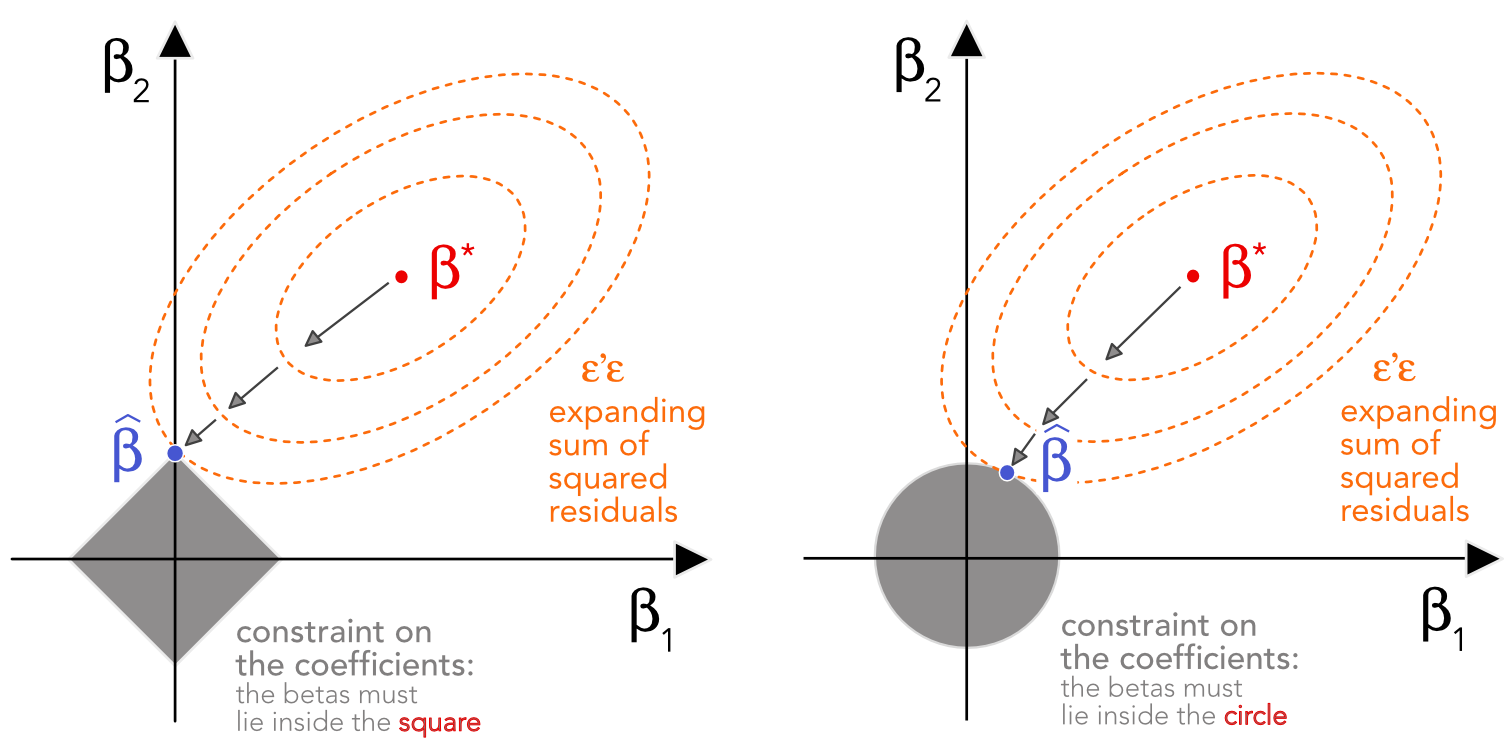

- 더 큰 오차수준 허용해 $\beta^*$의 주변부 탐색
- 오차에 대한 요구사항이 충분히 느슨해지면 타원체와 허용 가능 경계가 접함 -> 제약 조건 상 해가 위치한 곳

- OLS solution in Ridge Regression: $\hat{\beta}=(X'X+\lambda I_N)^{-1}X'Y$
$\\$ : $\lambda$ 증가하면 $\hat{\beta}_i$ 감소 -> 패널티: 축소기법

- Elasticnet: $y_i=\sum^J_{j=1}\beta_j x_{i,j}+\epsilon_i,\ s.t.\ \alpha\sum^J_{j=1}|\beta_j|+(1-\alpha)\sum^J_{j=1}\beta^2_j<\delta,\ i=1,...,N$

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


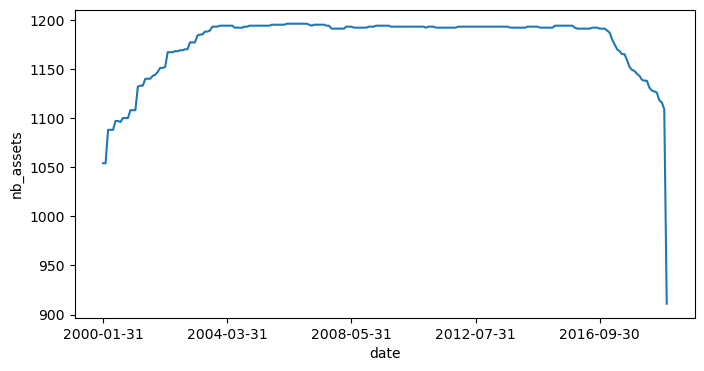

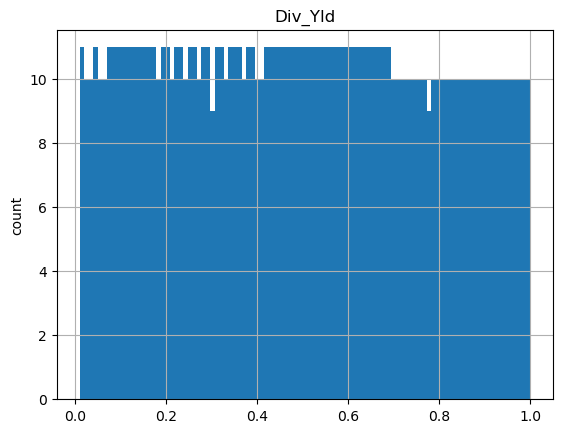

In [1]:
import import_ipynb
from Ch1 import data_ml

In [ ]:
# Lasso
from Ch1 import features
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
y_penalized=data_ml['R1M_Usd'].values # 종속 변수
X_penalized=data_ml[features].values # 예측 인자
alphas=np.arange(1e-4, 1.0e-3, 1e-5)
lasso_res={} # 모델 결과 딕셔너리

In [3]:
import pandas as pd
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_penalized, y_penalized)
    lasso_res[alpha]=lasso.coef_
df_lasso_res=pd.DataFrame.from_dict(lasso_res).T
df_lasso_res.columns=features
# 각 변수별 세로 합계: 모든 alpha 실험 통틀어서 총 얼마나 영향력을 발휘했는가? 점수화
# 그 합게 점수가 0.05보다 크면 중요한거
predictors=(df_lasso_res.abs().sum()>0.05)

<Axes: xlabel='Lambda', ylabel='Beta'>

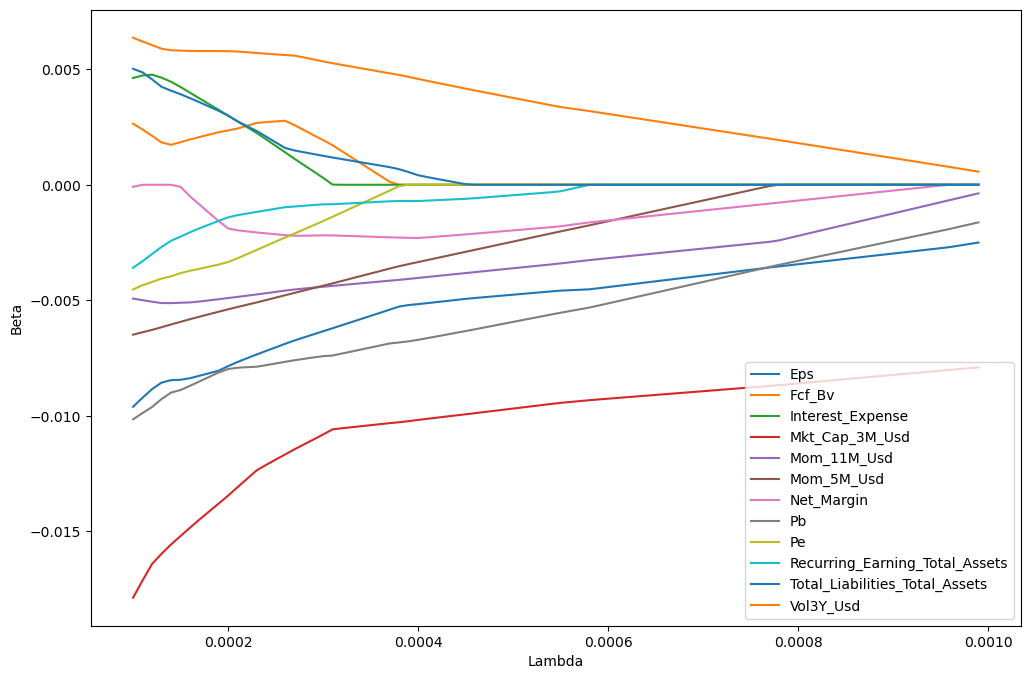

In [5]:
import matplotlib.pyplot as plt
df_lasso_res.loc[:,predictors].plot(xlabel='Lambda',ylabel='Beta',figsize=(12,8))

<Axes: xlabel='Lambda', ylabel='Beta'>

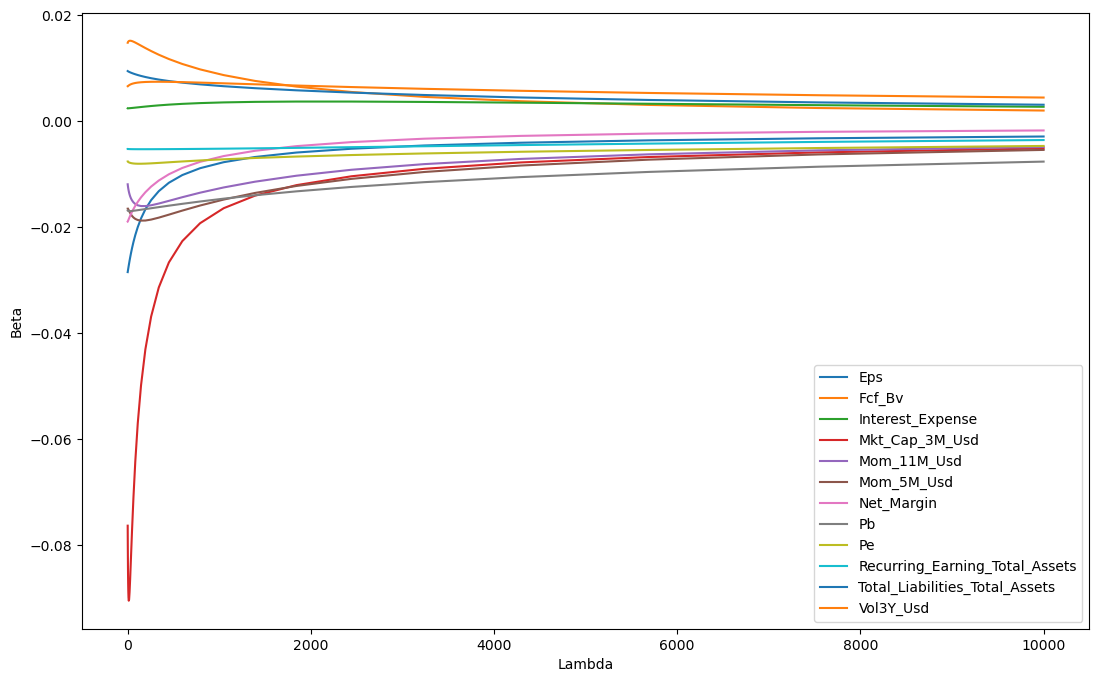

In [7]:
# Ridge
n_alphas=50
alphas=np.logspace(-2,4,n_alphas)
ridge_res={}
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_penalized, y_penalized)
    ridge_res[alpha]=ridge.coef_
df_ridge_res=pd.DataFrame.from_dict(ridge_res).T
df_ridge_res.columns=features
df_ridge_res.loc[:,predictors].plot(xlabel='Lambda',ylabel='Beta',figsize=(13,8))

=> 0으로 수렴이 훨씬 더 부드러움: x축에 로그 스케일이 있음 -> 초기 패턴(0에 가까운 왼쪽)을 더 명확하게 확인 가능

[5.2] 최소 분산 포트폴리오를 위한 희소 헤징
1. Generally, MSR(최대 샤프 지수 포트폴리오), Mean-Variance(최소 분산 포트폴리오) 구하려면 공분산 행렬의 역행렬 필요: $w_{MSR}\  \propto\ \sum^{-1}\mu$
2. 역공분산 행렬의 한 행을 구하는 것: 특정 자산을 나머지 모든 자산으로 회귀 분석하는 것과 같음: 1st row of $sum^{-1}=\frac{1}{\sigma^2_{\epsilon_1}}\times[1,-\beta_{1|2},...,-\beta_{1|N}]$
- $\sigma^2_{\epsilon_1}$: 회귀 분석의 잔차 분산
3. 헤지 전략: 자산 1에 대해 1만큼 Long 포지션, 나머지 자산들 $-\beta$만큼 short 포지션 -> 나머지 자산들을 이용해 자산1의 변동성을 최대한 헤징하는 포트폴리오
4. 희소 헤징: OLS 대신 LASSO(L1 규제)나 Elastic Net 사용
- Sparsity: 모든 자산 사용 x, 가장 효과적인 몇몇 자산만 골라서 헤징

In [ ]:
from Ch1 import returns, separation_date
# returns: index='date',columns='stock_id',values='R1M_Usd' for 주요 종목
t_oos=returns.index[returns.index>separation_date].values
Tt=len(t_oos)
nb_port=3 # 포트폴리오/전략 개수
port_weights={}
port_returns={}

In [9]:
def weights_sparsehedge(returns, alpha, Lambda):
    weights=[]
    # 엘라스틱 모델
    lr=ElasticNet(alpha=alpha, l1_ratio=Lambda)
    for col in returns.columns: # 종목별로 루프
        y=returns[col].values
        X=returns.drop(col, axis=1).values # numpy 배열: 행별로
        lr.fit(X,y)
        err=y-lr.predict(X)
        w=(1-np.sum(lr.coef_))/np.var(err)
        weights.append(w)
    return weights/np.sum(weights) # 가중치 정규화

In [10]:
def weights_multi(returns, j, alpha, Lambda):
    N=returns.shape[1]
    # 1: 동일 가중 ~ EW 벤치마크
    if j==0:
        return np.repeat(1/N,N)
    # 2: 최소 분산 ~ 고전적 GMV
    elif j==1:
        # 공분산 행렬 + 규제항
        sigma=np.cov(returns.T)+1e-2*np.identity(N)
        # 행렬 곱과 역행렬 계산
        w=np.matmul(np.linalg.inv(sigma),np.repeat(1,N))
        return w/np.sum(w)
    # 3: 엘라스틱넷 ~ 희소 헤징 최소 분산
    elif j==2: 
        return weights_sparsehedge(returns, alpha, Lambda)

In [11]:
for m, month in np.ndenumerate(t_oos):
    temp_data=returns.loc[returns.index<month]
    realised_returns=returns.loc[returns.index==month].values
    weights_temp={}
    returns_temp={}

    for j in range(nb_port):
        wgts=weights_multi(temp_data, j, 0.1, 0.1)
        rets=np.sum(wgts*realised_returns)
        weights_temp[j]=wgts
        returns_temp[j]=rets
    
    port_weights[month]=weights_temp
    port_returns[month]=returns_temp

port_returns_final=pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k,v in port_returns.items()}, axis=0).reset_index()

colnames=['date','strategy','return']
port_returns_final.columns=colnames
strategies_name={0:'EW',1:'MV',2:'Sparse'}
port_returns_final['strategy']=port_returns_final['strategy'].replace(strategies_name)
pd.DataFrame(port_returns_final.groupby('strategy')['return'].std()).T # 포트폴리오 변동성

strategy,EW,MV,Sparse
return,0.041804,0.033504,0.034882


In [12]:
# 패널티 예측 회귀
from Ch1 import idx_train, idx_test
training_sample=data_ml[data_ml.index.isin(idx_train)]
testing_sample=data_ml[data_ml.index.isin(idx_test)]

y_penalized_train=training_sample['R1M_Usd'].values
X_penalized_trian=training_sample[features].values
model=ElasticNet(alpha=0.1, l1_ratio=0.1)
fit_pen_pred=model.fit(X_penalized_trian, y_penalized_train)

In [13]:
y_penalized_test=testing_sample['R1M_Usd'].values
X_penalized_test=testing_sample[features].values
mse=np.mean((fit_pen_pred.predict(X_penalized_test)-y_penalized_test)**2)
print(f'MSE: {mse}')

MSE: 0.03699695809185003


In [ ]:
# 적중률: 예측이 수익률 부호를 정확하게 추측한 횟수
hitratio=np.mean(fit_pen_pred.predict(X_penalized_test)*y_penalized_test>0) # 0보다 큰 경우가 전체 중의 얼마나 되는지
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.5460346399270738


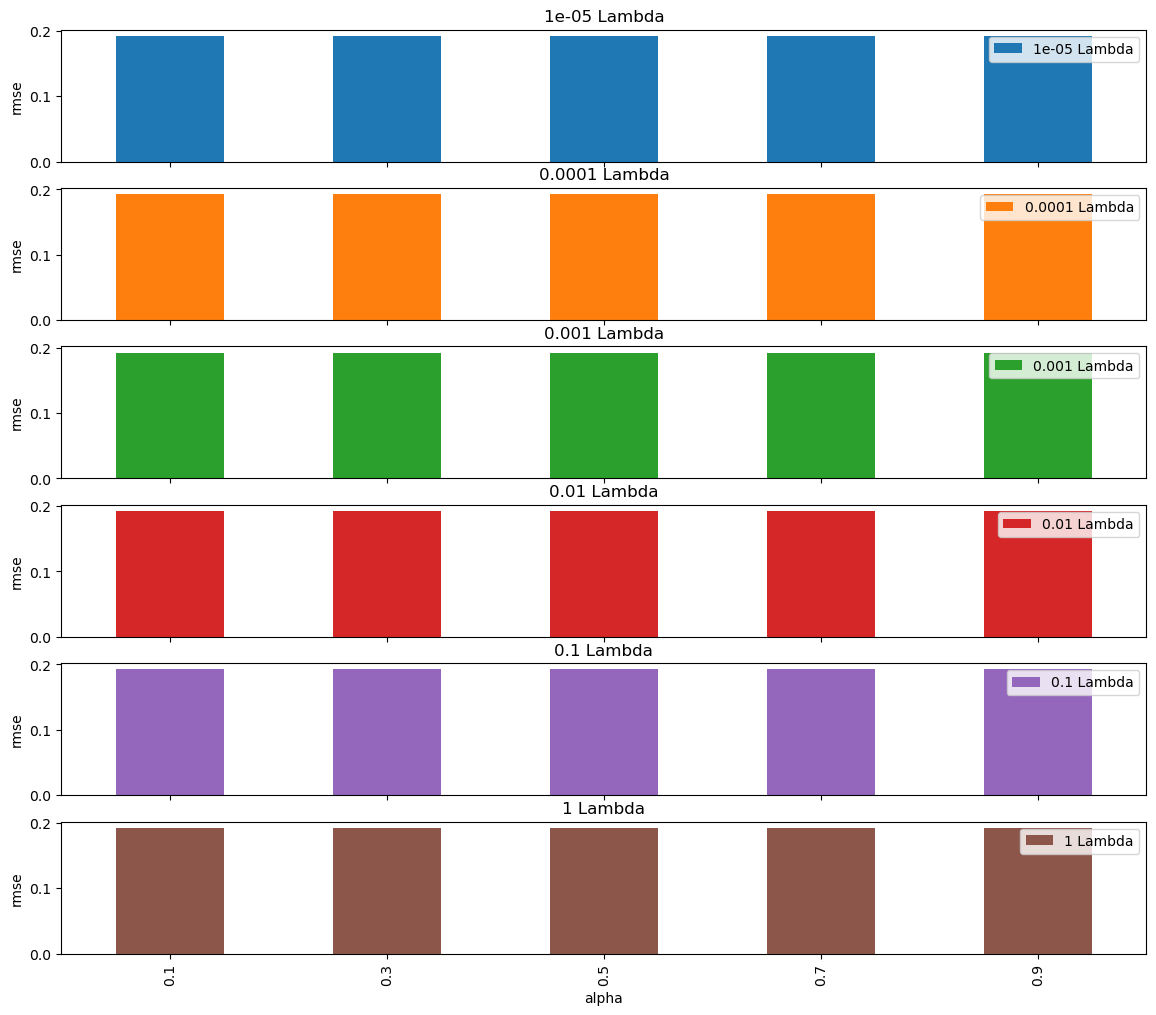

In [17]:
# 엘라스틱 넷의 매개 변수가 표본 외 정확도에 미치는 영향
y_penalized_train=training_sample['R1M_Usd'].values
X_penalized_trian=training_sample[features].values

y_penalized_test=testing_sample['R1M_Usd'].values
X_penalized_test=testing_sample[features].values

lasso_sens=[]
alpha_seq=list(np.round(np.arange(0.1,1.1,0.2),2))
lambda_seq=[1e-5,1e-4,1e-3,1e-2,1e-1,1]

import itertools # 모든 경우의 수 ~ Grid Search

for i, j in itertools.product(alpha_seq, lambda_seq): 
    model=ElasticNet(alpha=i, l1_ratio=j)
    fit_tmp=model.fit(X_penalized_trian, y_penalized_train)
    rmse=np.sqrt(np.mean(
        (fit_tmp.predict(X_penalized_test)-y_penalized_test)**2
    ))
    lasso_sens.append([rmse,i,j])

lasso_sens=pd.DataFrame(lasso_sens,columns=['rmse','alpha','lambda'])
rmse_elas=lasso_sens.pivot(index='alpha',columns='lambda',values='rmse')
new_col_names=list(map(lambda x: str(x)+str(" Lambda"),lambda_seq))
rmse_elas.columns=new_col_names
rmse_elas.plot(
    figsize=(14,12), subplots=True, sharey=True, sharex=True, kind='bar',ylabel='rmse'
)
plt.show()
